In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [6]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.40025 stdev: 0.18783
Best fitness: 0.97228 - size: (2, 7) - species 3 - id 30
Average adjusted fitness: 0.326
Mean genetic distance 2.878, standard deviation 0.473
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.335 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52071 stdev: 0.23170
Best fitness: 0.97228 - size: (2, 7) - species 3 - id 30
Average adjusted fitness: 0.481
Mean genetic distance 2.908, standard deviation 0.476
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 3.916 sec (4.125 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56034 stdev: 0.23519
Best fitness: 0.97228 - size: (2, 7) - species 22 - id 30
Average adjusted fitness: 0.528
Mean genetic distance 2.893, standard deviation 0.489
Population of 203 members in 24 species
Total extinctions: 

Population's average fitness: 0.54425 stdev: 0.12299
Best fitness: 0.96458 - size: (4, 11) - species 13 - id 703
Average adjusted fitness: 0.275
Mean genetic distance 3.037, standard deviation 0.492
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.116 sec (6.418 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55822 stdev: 0.12867
Best fitness: 0.96458 - size: (4, 11) - species 13 - id 703
Average adjusted fitness: 0.253
Mean genetic distance 3.028, standard deviation 0.494
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.467 sec (6.593 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56777 stdev: 0.13769
Best fitness: 0.96458 - size: (4, 11) - species 13 - id 703
Average adjusted fitness: 0.229
Mean genetic distance 3.018, standard deviation 0.505
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 5.891 sec (6.492 average)

 ****** Runn

Population's average fitness: 0.60172 stdev: 0.23538
Best fitness: 0.98252 - size: (3, 10) - species 23 - id 718
Average adjusted fitness: 0.300
Mean genetic distance 3.135, standard deviation 0.507
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 4.714 sec (4.956 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58563 stdev: 0.23685
Best fitness: 0.98252 - size: (3, 10) - species 23 - id 718
Average adjusted fitness: 0.292
Mean genetic distance 3.079, standard deviation 0.506
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 4.641 sec (4.925 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59499 stdev: 0.24582
Best fitness: 0.98252 - size: (3, 10) - species 23 - id 718
Average adjusted fitness: 0.514
Mean genetic distance 3.098, standard deviation 0.496
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 4.796 sec (5.061 average)

 ****** Run

Population's average fitness: 0.59033 stdev: 0.21256
Best fitness: 0.93256 - size: (4, 10) - species 32 - id 1723
Average adjusted fitness: 0.466
Mean genetic distance 3.113, standard deviation 0.507
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 4.794 sec (5.161 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60351 stdev: 0.20656
Best fitness: 0.93256 - size: (4, 10) - species 32 - id 1723
Average adjusted fitness: 0.478
Mean genetic distance 3.110, standard deviation 0.515
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 4.887 sec (5.157 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60279 stdev: 0.21161
Best fitness: 0.93256 - size: (4, 10) - species 32 - id 1723
Average adjusted fitness: 0.479
Mean genetic distance 3.118, standard deviation 0.514
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 4.956 sec (5.164 average)

 ******

Generation time: 6.788 sec (6.898 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61929 stdev: 0.18484
Best fitness: 0.98815 - size: (5, 13) - species 37 - id 1740
Average adjusted fitness: 0.433
Mean genetic distance 3.053, standard deviation 0.472
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 8.819 sec (7.132 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62185 stdev: 0.18302
Best fitness: 0.98815 - size: (5, 13) - species 37 - id 1740
Average adjusted fitness: 0.139
Mean genetic distance 3.024, standard deviation 0.490
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 9.176 sec (7.407 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61549 stdev: 0.18388
Best fitness: 0.98815 - size: (5, 13) - species 37 - id 1740
Average adjusted fitness: 0.401
Mean genetic distance 3.004, standard deviation 0.513
Population of 201 members in 

Population's average fitness: 0.50389 stdev: 0.12303
Best fitness: 0.94072 - size: (3, 9) - species 9 - id 264
Average adjusted fitness: 0.469
Mean genetic distance 3.016, standard deviation 0.541
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 2.504 sec (2.416 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52522 stdev: 0.15493
Best fitness: 0.98210 - size: (3, 10) - species 21 - id 466
Average adjusted fitness: 0.469
Mean genetic distance 3.039, standard deviation 0.503
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 2.755 sec (2.529 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54996 stdev: 0.16459
Best fitness: 0.98210 - size: (3, 10) - species 4 - id 466
Average adjusted fitness: 0.496
Mean genetic distance 3.016, standard deviation 0.523
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 2.896 sec (2.621 average)

 ****** Running

Population's average fitness: 0.57825 stdev: 0.17465
Best fitness: 0.91992 - size: (6, 16) - species 26 - id 928
Average adjusted fitness: 0.487
Mean genetic distance 2.984, standard deviation 0.471
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 2.810 sec (2.472 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59778 stdev: 0.16820
Best fitness: 0.91992 - size: (6, 16) - species 26 - id 928
Average adjusted fitness: 0.485
Mean genetic distance 2.983, standard deviation 0.479
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 2.846 sec (2.525 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59959 stdev: 0.18000
Best fitness: 0.91992 - size: (6, 16) - species 26 - id 928
Average adjusted fitness: 0.497
Mean genetic distance 2.992, standard deviation 0.466
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 2.684 sec (2.545 average)

 ****** Runn

Population's average fitness: 0.67948 stdev: 0.24443
Best fitness: 0.98748 - size: (4, 12) - species 34 - id 1225
Average adjusted fitness: 0.630
Mean genetic distance 3.036, standard deviation 0.506
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 4.323 sec (4.116 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65813 stdev: 0.24854
Best fitness: 0.98748 - size: (4, 12) - species 34 - id 1225
Average adjusted fitness: 0.613
Mean genetic distance 3.031, standard deviation 0.513
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 4.515 sec (4.235 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68518 stdev: 0.24151
Best fitness: 0.98748 - size: (4, 12) - species 34 - id 1225
Average adjusted fitness: 0.644
Mean genetic distance 3.017, standard deviation 0.502
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 4.546 sec (4.241 average)

 ******

Population's average fitness: 0.54781 stdev: 0.18997
Best fitness: 0.72456 - size: (4, 9) - species 21 - id 1731
Average adjusted fitness: 0.246
Mean genetic distance 3.013, standard deviation 0.531
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 4.245 sec (4.025 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57213 stdev: 0.18412
Best fitness: 0.72456 - size: (4, 9) - species 21 - id 1731
Average adjusted fitness: 0.261
Mean genetic distance 3.053, standard deviation 0.535
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.222 sec (4.062 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.55649 stdev: 0.18861
Best fitness: 0.72456 - size: (4, 9) - species 21 - id 1731
Average adjusted fitness: 0.248
Mean genetic distance 3.053, standard deviation 0.529
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 4.272 sec (4.118 average)

 ****** Ru

Population's average fitness: 0.58885 stdev: 0.21060
Best fitness: 0.94479 - size: (5, 12) - species 4 - id 1859
Average adjusted fitness: 0.361
Mean genetic distance 3.114, standard deviation 0.525
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 4.432 sec (4.600 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59595 stdev: 0.21061
Best fitness: 0.94479 - size: (5, 12) - species 4 - id 1859
Average adjusted fitness: 0.370
Mean genetic distance 3.101, standard deviation 0.527
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 4.257 sec (4.625 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60053 stdev: 0.21080
Best fitness: 0.94479 - size: (5, 12) - species 4 - id 1859
Average adjusted fitness: 0.383
Mean genetic distance 3.101, standard deviation 0.541
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 4.421 sec (4.669 average)
number of c

Population's average fitness: 0.51721 stdev: 0.06287
Best fitness: 0.81921 - size: (2, 7) - species 2 - id 93
Average adjusted fitness: 0.276
Mean genetic distance 2.886, standard deviation 0.500
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 2.449 sec (2.330 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52384 stdev: 0.05851
Best fitness: 0.81921 - size: (2, 7) - species 2 - id 93
Average adjusted fitness: 0.053
Mean genetic distance 2.919, standard deviation 0.526
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 2.510 sec (2.390 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53089 stdev: 0.07484
Best fitness: 0.81921 - size: (2, 7) - species 2 - id 93
Average adjusted fitness: 0.353
Mean genetic distance 2.938, standard deviation 0.521
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 2.601 sec (2.443 average)

 ****** Running gener

Population's average fitness: 0.63049 stdev: 0.16379
Best fitness: 0.72127 - size: (3, 8) - species 28 - id 302
Average adjusted fitness: 0.332
Mean genetic distance 3.074, standard deviation 0.554
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 4.072 sec (4.065 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64313 stdev: 0.15494
Best fitness: 0.72195 - size: (4, 9) - species 28 - id 1173
Average adjusted fitness: 0.346
Mean genetic distance 3.088, standard deviation 0.555
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 4.240 sec (4.090 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64607 stdev: 0.15426
Best fitness: 0.72195 - size: (4, 9) - species 28 - id 1173
Average adjusted fitness: 0.346
Mean genetic distance 3.076, standard deviation 0.531
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 4.193 sec (4.103 average)

 ****** Runni

Generation time: 5.144 sec (4.625 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61994 stdev: 0.18442
Best fitness: 0.89589 - size: (4, 9) - species 21 - id 781
Average adjusted fitness: 0.364
Mean genetic distance 3.037, standard deviation 0.511
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 5.236 sec (4.779 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63549 stdev: 0.17879
Best fitness: 0.89589 - size: (4, 9) - species 21 - id 781
Average adjusted fitness: 0.478
Mean genetic distance 3.054, standard deviation 0.501
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 5.042 sec (4.885 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64474 stdev: 0.17566
Best fitness: 0.89589 - size: (4, 9) - species 21 - id 781
Average adjusted fitness: 0.391
Mean genetic distance 3.066, standard deviation 0.494
Population of 201 members in 40 spe

In [8]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [14]:
np.sum(list_P == testy)/2000

0.7205

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[2] real:2
#1 index:[2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2] real:3
#6 index:[2] real:3
#7 index:[2] real:3
#8 index:[5] real:3
#9 index:[2] real:3
#10 index:[5] real:3
#11 index:[2] real:3
#12 index:[2] real:3
#13 index:[2] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[5] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[2] real:2
#24 index:[2] real:2
#25 index:[5] real:2
#26 index:[2] real:2
#27 index:[4] real:4
#28 index:[5] real:5
#29 index:[5] real:5
#30 index:[5] real:5
#31 index:[4] real:4
#32 index:[2] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[2] real:3
#37 index:[5] real:3
#38 index:[2] real:3
#39 index:[5] real:3
#40 index:[5] real:3
#41 index:[5] real:3
#42 index:[2] real:2
#43 index:[2] real:2
#44 index:[2] real:2
#45 index:[5] real:2
#46 index:[2] real:2
#47 index:[2] real:2
#4

#615 index:[5] real:5
#616 index:[5] real:5
#617 index:[2 3 5] real:5
#618 index:[5] real:5
#619 index:[5] real:5
#620 index:[5] real:5
#621 index:[5] real:5
#622 index:[2 3 5] real:5
#623 index:[4] real:4
#624 index:[4] real:4
#625 index:[1] real:1
#626 index:[1] real:1
#627 index:[1] real:1
#628 index:[1] real:1
#629 index:[5] real:2
#630 index:[2] real:2
#631 index:[2] real:2
#632 index:[2] real:2
#633 index:[1 4] real:1
#634 index:[1] real:1
#635 index:[1] real:1
#636 index:[2 5] real:5
#637 index:[5] real:5
#638 index:[5] real:5
#639 index:[5] real:5
#640 index:[5] real:5
#641 index:[5] real:5
#642 index:[2] real:5
#643 index:[4 5] real:5
#644 index:[5] real:5
#645 index:[2 5] real:5
#646 index:[5] real:5
#647 index:[5] real:5
#648 index:[4] real:4
#649 index:[4] real:4
#650 index:[4] real:4
#651 index:[4] real:4
#652 index:[1] real:1
#653 index:[1] real:1
#654 index:[1] real:1
#655 index:[1] real:1
#656 index:[1] real:1
#657 index:[2] real:2
#658 index:[2] real:2
#659 index:[2] r

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[448   0   2   0  17   0]
 [  1 198   0   0  10   0]
 [  8   0 316  98   9 116]
 [  0   1   5   6   4  15]
 [  4  24   1   1 143   9]
 [  0   1  73 106  54 330]]


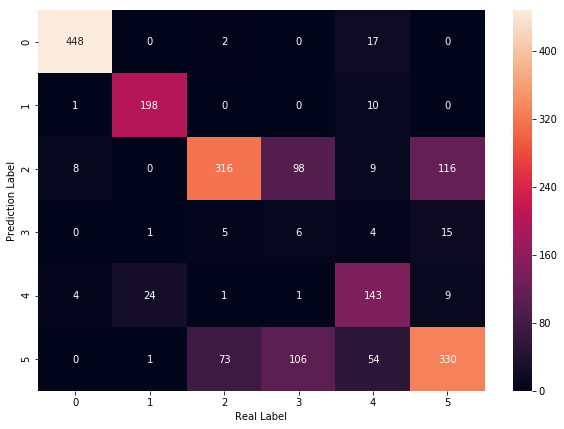

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()